# Laboratory 4

In this assignment you are going to use two feature extractors:

    SelectKBest
    ExtraTreeClassifier

Also, you will study the *data normalization, correlation matrix, pandas library*.

# Лабораторная работа №4

В данной работе вы познакомитесь с двумя методами нахождения информативных признаков:

    SelectKBest
    ExtraTreeClassifier

Также вы познакомитесь с *нормализацией данных, корреляционной матрицей и библиотекой pandas*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Pandas introduction

Read the .csv file and create DataFrame from it

`data = pd.read_csv('Lab_4_data/train.csv')`

In some cases you might need to read the file using more complex syntax:

`data = pd.read_csv('csv_filename', sep=';', decimal=',')`

which specify character to recognize as decimal point and delimiter (`sep`) to use

---

Чтение .csv файла и создание DataFrame объекта выполняется следующей командой:

`data = pd.read_csv('Lab_4_data/train.csv')`

В некоторых случая для чтения файла вам может понадобиться более сложный синтаксис:

`data = pd.read_csv('csv_filename', sep=';', decimal=',')`

в котором указывается символ используемый в вещественных числах и разделяющий (`sep`) символ.

In [2]:
data = pd.read_csv('Lab_4_data/train.csv')

In [3]:
# Check a few rows of the table
# Проверим несколько строк таблицы
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


The column `price_range` contains labels. All the other columns contain features.

---

Столбец  `price_range` содержит метки классов. Остальные столбцы являются признаками.

We can indexing in DataFrames by columns.

---

Мы можем индексировать DataFrame по столбцам.

In [4]:
# Insert a list of columns to get data from
# It returns new DataFrame that refers to the previous one (if you change data in it, the original one will be changed as well)
data[['battery_power', 'fc']].head() 

,battery_power,fc
0,842,1
1,1021,0
2,563,2
3,615,0
4,1821,13


To do indexing by rows' positions you can use `.iloc[]` method. 

---

Для индексации по строкам можно использовать метод `.iloc[]`.

In [5]:
data.iloc[:5]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


To select columns use the second position in the `iloc[rows_indeces, column_indeces]`.

---

Для того что бы выбрать строки, используйте второй аргумент в `iloc[rows_indeces, column_indeces]`.

In [6]:
data.iloc[:5, 2:4]

,clock_speed,dual_sim
0,2.2,0
1,0.5,1
2,0.5,1
3,2.5,0
4,1.2,0


Let's separate the features and the labels from each other.

In our case labels - the last column, features - all the other ones.

---

Разделим признаки и метки классов друг от друга.

В нашем случае метки - последний столбец, признаки - остальные.

In [7]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1:] 

In [8]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [9]:
y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


Get statistical characteristics about each column using the `describe` method.

---

Получим статистические данный для каждого столбца использовав метод `describe`

In [10]:
x.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In order to get values as **numpy array** from the DataFrame use the `.values` property.

---

Для того что бы получить значения DataFrame в виде numpy массива используйте поле `.values`

In [11]:
type(x.values), type(y.values)

(numpy.ndarray, numpy.ndarray)

In order to get columns names use the `.columns` property.

---

Для того что бы получить названия столбцов используйте поле `.columns`.

In [12]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

# Informative feature selection

The features that you use to train your machine learning models have a huge influence on the performance you can achieve.
<b>Hence, irrelevant or partially relevant features can negatively impact model performance.</b>
Using the informative (relevant) features, usually, helps a model work faster and better.

Why feature selection may be done:
<ul>
    <li><b>Overfitting  Mitigation</b>: Less redundant and noisy features make the model have better generalization capability.</li>
    <li><b>Improves Accuracy</b>: Less misleading features means modeling accuracy improves.</li>
    <li><b>Reduces Training Time</b>: Fewer features reduce algorithm complexity and algorithms train faster.</li>
</ul>

---

## Отбор информативных признаков

Признаки, который вы используете для своих моделей машинного обучения имеют сильное влияние на получаемые моделью результаты.
__Поэтому, неинформативные или *частично* информативные признаки могут негативно сказать на точности модели.__
Использование информативных признаков, чаще всего, позволяет модели работать быстрее и лучше.

Причины по которым отбор признаков может быть произведен:
<ul>
    <li><b>Уменьшает переобучение</b>: Меньше неинформативных и зашумленных признаков позволяет модели иметь лучшую обобщающую способность.</li>
    <li><b>Улучшает точность</b>: Меньшее число ведущих к неверным выводам признаков, означают повышение точности модели.</li>
    <li><b>Уменьшает время обучения</b>: Меньшее число признаков уменьшает сложности модели и увеличивает скорость обучения модели.<b/></li>
</ul>

In [13]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

### SelectKBest

This class selects `k` best features that correspond to the highest scores. The scores are formed by the `score_func`.
In this example, we use the `chi2` score function which stands for chi-squared function. By the following link, you can have a better study about chi-squared function application in case of feature selection.

https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

Note: if you can't access the site, try to use a private window.

---

Данный класс позволяет выбрать `k` лучших признаков, соответствущих наибольшему значению метрики определяемой функцией `score_func`. В настоящем примере мы используем функцию `chi2`, которая является функцией хи-квадрат. По следующей ссылке вы можете лучше изучить данную функцю в контексте задачи выбора информативных признаков.

https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

P.S. Если вы не можете воспользоваться сайтом, то попробуйте использовать private window.

In [14]:
best_features = SelectKBest(score_func=chi2, k=10)

In [15]:
fit = best_features.fit(x.values, y.values)

In [16]:
# Create DataFrame from given data with given columns and indeces
best_features = pd.DataFrame(data=fit.scores_, index=x.columns, columns=['chi2_score'])

In [17]:
# Sort rows by the absolute value
best_features.nlargest(10, 'chi2_score')

,chi2_score
ram,931267.519053
px_height,17363.569536
battery_power,14129.866576
px_width,9810.586750
mobile_wt,95.972863
int_memory,89.839124
sc_w,16.480319
talk_time,13.236400
fc,10.135166
sc_h,9.614878


### Extra Tree Classifier

`ExtraTreeClassifier` does not belong to the feature selection method by itself. But it can be used to define features importances coefficients which might be used to perform features selection.

---

`ExtraTreeClassifier` сам по себе не является методом отбора информативных признаков. Однако он *может* быть использовать для определения коэффициентов важности (информативности) признаков, которые могут быть использованы для выбора наиболее информативных признаков.

In [18]:
model = ExtraTreesClassifier()
model = model.fit(x.values, y.values)

<ipython-input-18-cd26cf668299>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x.values, y.values)


Create DataFrame from gathered `feature_importances_`. And print 10 features with the highest corresponding value of importances.

---
 
Создадим DataFrame из полученных значений `feature_importances_`. И выведем 10 признаков с наибольшими соответствующими значениями информативности.

In [19]:
best_features = pd.DataFrame(data=model.feature_importances_, index=x.columns, columns=['feature_importance'])

In [20]:
best_features.nlargest(10, 'feature_importance')

,feature_importance
ram,0.394465
battery_power,0.061072
px_width,0.048104
px_height,0.047183
mobile_wt,0.036857
int_memory,0.035792
talk_time,0.034622
m_dep,0.034157
n_cores,0.033616
sc_w,0.033587


### Correlation matrix

Correlation matrix also may help to perform feature selection, let's study the example

---

### Корреляционная матрица

Корреляционная матрица также может помочь произвести отбор признаков, обратимся к примеру

In [21]:
correlation_matrix = data.corr()

We are mostly interested in the last row of the matrix, since it corresponds to the labels.
According to the matrix the `price_range` is highly correlated with the `ram`. Using the aforementioned methods we know that `ram` feature is the most informative. Also, features `battery_power`, `px_height` and `px_width` are highly correlated with `price_range`. Therefore, the correlation matrix is very consistent with the results gathered above. 

---

Больше всего нас сейчас интересует последняя строка матрицы, т.к. она соотвествует меткам классов. Согласно матрице, `price_range` сильно коррелирует с признаком `feature`. Используя упомянутые ранее методы мы знаем, что признак `ram` - самый информативный. Также, признаки `battery_power`, `px_height` и `px_width` сильно коррелируют с `price_range`. Таким образом, полученная корреляционная матрица хорошо согласуется с результатми полученными ранее

<AxesSubplot:>

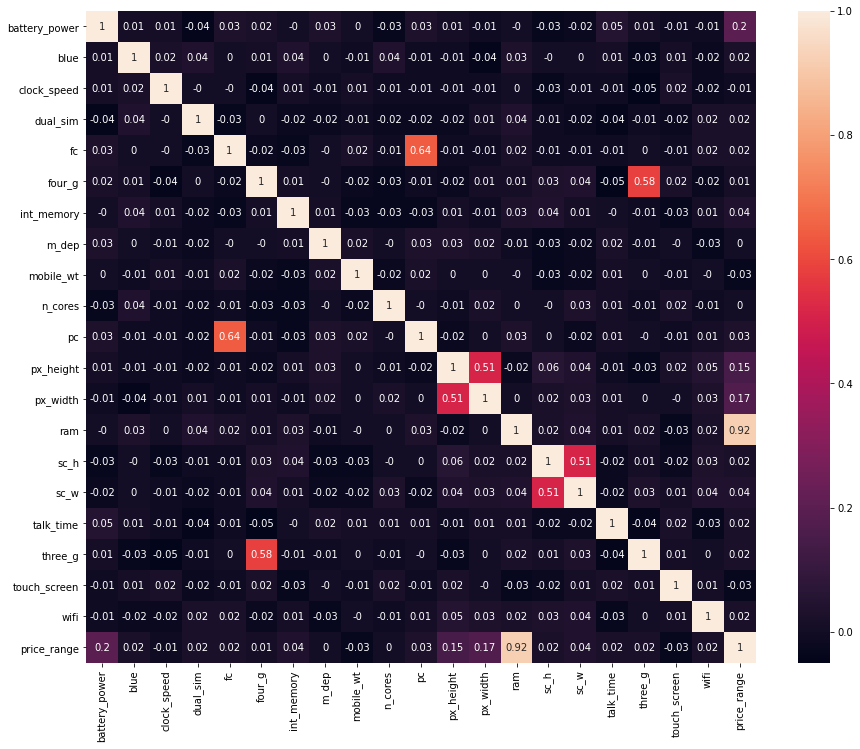

In [22]:
plt.figure(figsize=(15,12))
sns.heatmap(np.round(correlation_matrix, decimals=2), annot=True)

## Data Normalization

Before training the model it is important to normalize the data - transform all the values to the desired range. There are different types of data normalization:

* Z-Normalization (Standardization) - transforms the initial data to the zero mean and unit variance.
* Min-Max Normalization - transforms the initial data to the range [0, 1].
* Unit Vector Normalization - transforms the initial data in the way each vector has unit length.

It is needed because features with small absolute values can be 'shadowed' by the features with larger absolute values. 

---

## Нормализация данных

Очень важно перед обучением модели произвести нормализацию данных. Нормализация данных это приведение всех значений данных к определенному распределению. Есть несколько видов нормализации данных:

* Z-Normalization (Standartization) - трансформирует исходные данные к нулевому среднему и единичной дисперсии.
* Min-Max Normalization - трансформирует исходные данные к диапазону значений [0, 1].
* Unit Vector Normalization - трансформирует исходные таким образом, чтобы каждый вектор признаков имел единичную длину.

Нормализация данных необходима т.к. признаки с большими абсолютными значениями могут быть предпочтены, алгоритмом, признакам с меньшими абсолютнымит значениями. 

### Regularized linear models with stochastic gradient descent (SGD) learning

In [23]:
from sklearn.linear_model import SGDClassifier

[SGDClassifier official documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

[SGDClassifier оффициальная документация](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

#### Train with unnormalized data
----
#### Обучение на ненормализованных данных

In [24]:
model_unnorm = SGDClassifier(loss='log', penalty='l1', l1_ratio=1., random_state=0)

In [25]:
model_unnorm = model_unnorm.fit(x.values, y.values)

c:\users\ntg\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
model_unnorm.score(x.values, y.values)

0.577

In [27]:
y_pred = model_unnorm.predict(x.values)

<AxesSubplot:>

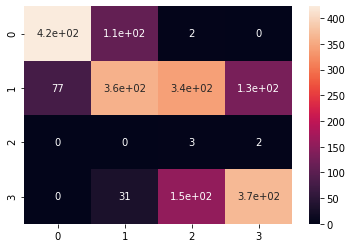

In [28]:
sns.heatmap(confusion_matrix(y_pred, y), annot=True)

#### Train with normalized data
----
#### Обучение с нормированными данными

In [29]:
model_norm = SGDClassifier(loss='log', penalty='l1', l1_ratio=1., random_state=0)

In [30]:
model_norm = model_norm.fit((x.values - x.values.mean(axis=0))/x.values.std(axis=0), y.values)

c:\users\ntg\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
model_norm.score((x.values - x.values.mean(axis=0))/x.values.std(axis=0), y.values)

0.8615

In [32]:
y_pred = model_norm.predict((x.values - x.values.mean(axis=0))/x.values.std(axis=0))

<AxesSubplot:>

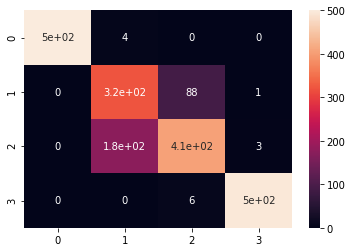

In [33]:
sns.heatmap(confusion_matrix(y_pred, y), annot=True)

#### Checking the features' importance
----
#### Проверим информативность признаков

This classifier consists of several linear regressions - one regression for each class.

---

Используемый классификатор состоит из нескольких линейных регресиий, каждая из которых соответствует одному из классов

In [34]:
model_unnorm.coef_.shape

(4, 20)

The following matrix consists of 4 columns (one for each class) with 20 rows (one for each input feature). Each row corresponds to the coefficients of one linear regression for one class. 
Thus, by looking at the absolute values of each coefficient in the rows we can see the importance of the features to the corresponding class.

---

Следующая матрица состоит из 4 столбцов (по одному для каждого класс) и 20 строк (по одной для каждого признака). Значения каждой строки соответствуют значениями коффициентов линейной регрессии. Так, смотря на абсолютные значения каждого коэффициента в строке мы можем определить информативность конкретного признака для соответствующего класса.

In the case of unnormalized data, the coefficients are scaled according to the features' absolute values. Thus, it's difficult to see which feature is more or less important since their coefficients are highly correlated with their absolute values.

---
В случае ненормализованных данных, значения коэффициентов сильно коррелирует с абсолютными значениями признаков. Поэтому, исходя из данной матрицы тяжело выбрать признаки которые являются более или меннее информативными.

In [35]:
len(list(data.columns))

21

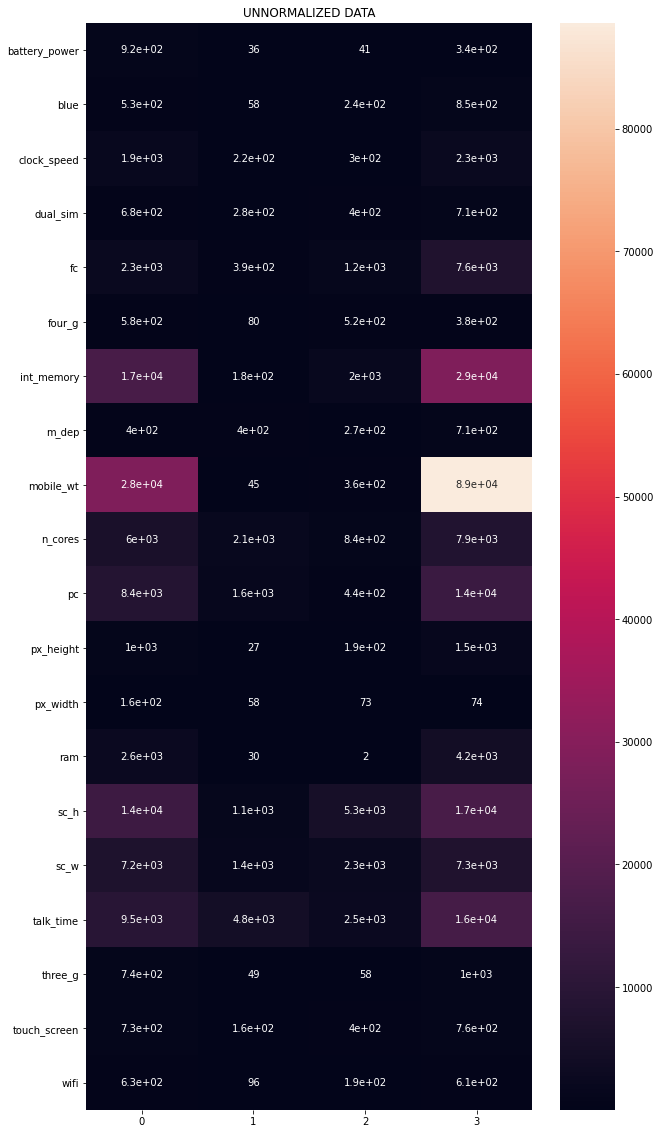

In [36]:
plt.figure(figsize=(10,20))
sns.heatmap(np.abs(np.round(model_unnorm.coef_.T, decimals=0)), annot=True)
plt.title('UNNORMALIZED DATA')
_ = plt.yticks(np.arange(len(data.columns) - 1) + 0.5, list(data.columns)[:-1], rotation=0)

In the case of normalized data, coefficients are not dependent on the features' absolute values and it becomes clear which features are more important for each class.

---

В случае нормированных данных, коэффициенты не зависят от абсолютных значений признаков, поэтому несложно выбрать признаки, которые являются наиболее информативными для каждого класса

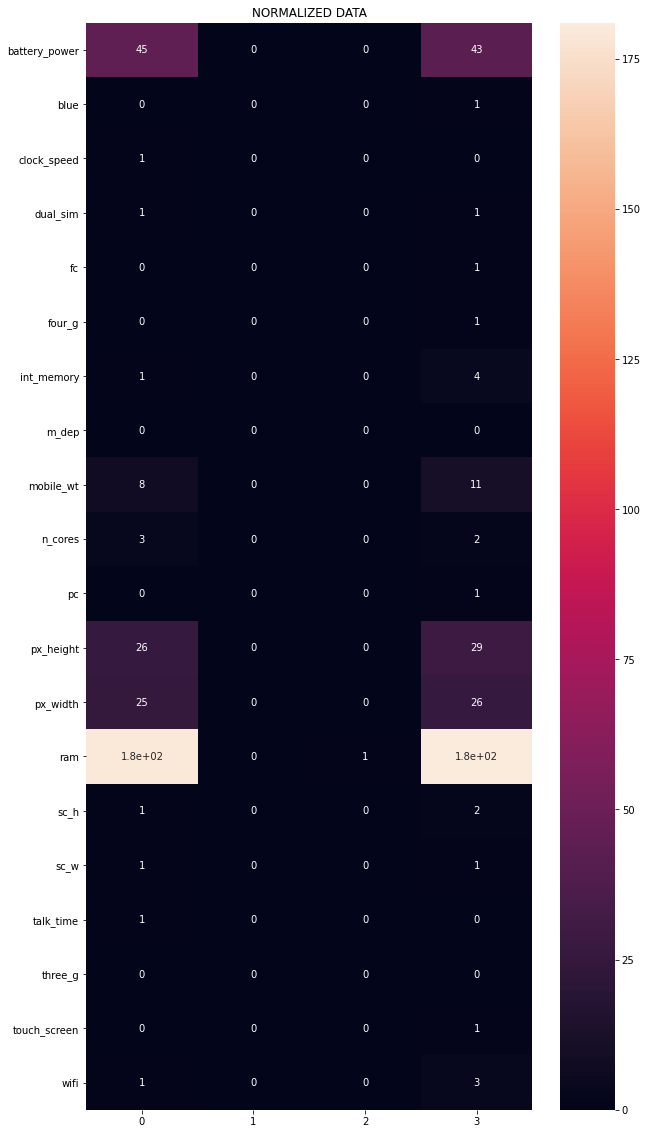

In [37]:
plt.figure(figsize=(10,20))
plt.title('NORMALIZED DATA')
sns.heatmap(np.abs(np.round(model_norm.coef_.T, decimals=0)), annot=True)
_ = plt.yticks(np.arange(len(data.columns) - 1) + 0.5, list(data.columns)[:-1], rotation=0)

In [38]:
for i in range(4):
    f_name = x.columns[np.abs(model_norm.coef_[i]).argmax()]
    print(f'For class {i} the most important feature is {f_name}')

For class 0 the most important feature is ram
For class 1 the most important feature is ram
For class 2 the most important feature is ram
For class 3 the most important feature is ram


# Hyperspectral Data Introduction

---

# Введение в гиперспектральные данные

In [39]:
specter = np.load('Lab_4_data/salinas.npy')
mask = np.load('Lab_4_data/salinas_mask.npy')

In [40]:
specter.shape, mask.shape

((512, 217, 224), (512, 217))

#### Data Description
<pre>
We have a hyperspecter (3D Tensor) with shape (512, 217, 224).
Where   224 - is number of layers (features); 
        512x217 - height and width.
</pre>

Each hyperspecter's layer corresponds with a certain [wavelength](https://en.wikipedia.org/wiki/Wavelength)

For the aforementioned hyperspecter 10th, 16th, and 35th are standing for blue, green, and red components of the RGB color model and can be used in the way of creating a color image.

---
#### Описание данных
<pre>
У нас есть гиперспектр (3Д Тензор) со следующими размерностями (512, 217, 224).
Где     224 - число слоев (признаков); 
        512x217 - высота и ширина.
</pre>

Каждый слой гиперспектра соответствует определенной [длине волны](https://ru.wikipedia.org/wiki/%D0%94%D0%BB%D0%B8%D0%BD%D0%B0_%D0%B2%D0%BE%D0%BB%D0%BD%D1%8B)

Для вышеупомянутого спектра 10ый, 16ый и 35ый слои соответствуют синей, зелёной и красной компоненте цветовой модели RGB и могут быть использованы для формирования цветного изображения.

We can visualize RGB layers as a regular image

---
Мы можем визуализировать RGB слои как обычное изображение

In [41]:
b_index = 10
g_index = 16
r_index = 35

# expand_dims(x, axis=2) makes shape transformation (h, w) -> (h, w, 1)
# expand_dims(x, axis=2) выполняет слеудющее преобразование формы (h, w) -> (h, w, 1)
b = np.expand_dims(specter[..., b_index], axis=2)
g = np.expand_dims(specter[..., g_index], axis=2)
r = np.expand_dims(specter[..., r_index], axis=2)

rgb_specter_representation = np.concatenate((r, g, b), axis=2)
rgb_specter_representation.shape

(512, 217, 3)

<AxesSubplot:>

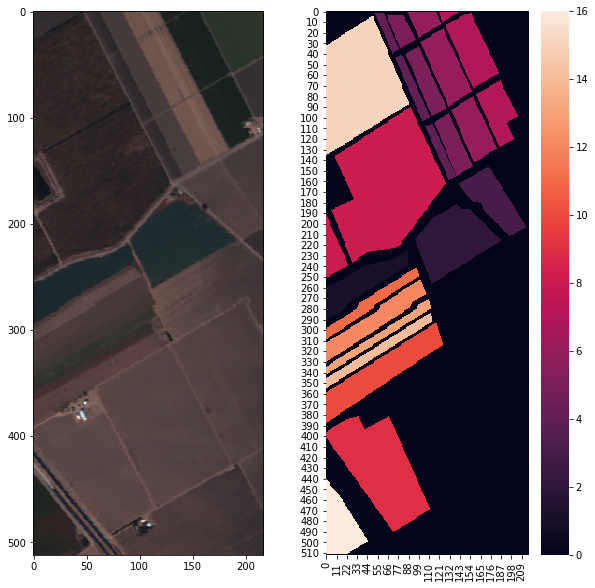

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10))
ax1.imshow(rgb_specter_representation)
sns.heatmap(mask, ax=ax2)



<tbody>
<tr>
<th style="border-style: solid; border-width: 1px"> #
</th>
<th style="border-style: solid; border-width: 1px"> Class
</th>
<th style="border-style: solid; border-width: 1px"> Samples
</th></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 1
</td>
<td style="border-style: solid; border-width: 1px"> Brocoli_green_weeds_1
</td>
<td style="border-style: solid; border-width: 1px"> 2009
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 2
</td>
<td style="border-style: solid; border-width: 1px"> Brocoli_green_weeds_2
</td>
<td style="border-style: solid; border-width: 1px"> 3726
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 3
</td>
<td style="border-style: solid; border-width: 1px"> Fallow
</td>
<td style="border-style: solid; border-width: 1px"> 1976
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 4
</td>
<td style="border-style: solid; border-width: 1px"> Fallow_rough_plow
</td>
<td style="border-style: solid; border-width: 1px"> 1394
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 5
</td>
<td style="border-style: solid; border-width: 1px"> Fallow_smooth
</td>
<td style="border-style: solid; border-width: 1px"> 2678
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 6
</td>
<td style="border-style: solid; border-width: 1px"> Stubble
</td>
<td style="border-style: solid; border-width: 1px"> 3959
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 7
</td>
<td style="border-style: solid; border-width: 1px"> Celery
</td>
<td style="border-style: solid; border-width: 1px"> 3579
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 8
</td>
<td style="border-style: solid; border-width: 1px"> Grapes_untrained
</td>
<td style="border-style: solid; border-width: 1px"> 11271
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 9
</td>
<td style="border-style: solid; border-width: 1px"> Soil_vinyard_develop
</td>
<td style="border-style: solid; border-width: 1px"> 6203
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 10
</td>
<td style="border-style: solid; border-width: 1px"> Corn_senesced_green_weeds
</td>
<td style="border-style: solid; border-width: 1px"> 3278
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 11
</td>
<td style="border-style: solid; border-width: 1px"> Lettuce_romaine_4wk
</td>
<td style="border-style: solid; border-width: 1px"> 1068
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 12
</td>
<td style="border-style: solid; border-width: 1px"> Lettuce_romaine_5wk
</td>
<td style="border-style: solid; border-width: 1px"> 1927
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 13
</td>
<td style="border-style: solid; border-width: 1px"> Lettuce_romaine_6wk
</td>
<td style="border-style: solid; border-width: 1px"> 916
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 14
</td>
<td style="border-style: solid; border-width: 1px"> Lettuce_romaine_7wk
</td>
<td style="border-style: solid; border-width: 1px"> 1070
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 15
</td>
<td style="border-style: solid; border-width: 1px"> Vinyard_untrained
</td>
<td style="border-style: solid; border-width: 1px"> 7268
</td></tr>
<tr>
<td style="border-style: solid; border-width: 1px"> 16
</td>
<td style="border-style: solid; border-width: 1px"> Vinyard_vertical_trellis
</td>
<td style="border-style: solid; border-width: 1px"> 1807
</td></tr></tbody>

Create a list of all the positions (y, x) for the hyperspecter

---

Создадим список всех возможных позиций (y, x) для гиперспектра

In [43]:
height = specter.shape[0]
width = specter.shape[1]
ordered_positions = np.array(np.meshgrid(np.arange(height), np.arange(width))).T.reshape(-1, 2)

In [44]:
from sklearn.model_selection import train_test_split

Shuffle and split this positions

---

Перемешать и разделить эти позиции

In [45]:
train_indices, test_indices = train_test_split(ordered_positions, train_size=0.05, shuffle=True)

Select train and test sets

---

Выберем тренировочные и тестовые выборки

In [46]:
x_train = []
y_train = []
x_test = []
y_test = []

In [47]:
for idx in train_indices:
    x_train.append(specter[idx[0], idx[1], ::])
    y_train.append(mask[idx[0], idx[1]])    
    
for idx in test_indices:
    x_test.append(specter[idx[0], idx[1], ::])
    y_test.append(mask[idx[0], idx[1]])    
    
x_train = np.array(x_train, copy=False)
y_train = np.array(y_train, copy=False)
x_test = np.array(x_test, copy=False)
y_test = np.array(y_test, copy=False)

In [48]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5555, 224), (5555,), (105549, 224), (105549,))

Сreate a model and train on the train set and check the model on the test set

---

Создадим модель обучив ее на тренировочном наборе данных и проверим ее на тестовом

In [49]:
from sklearn.neural_network import MLPClassifier

In [50]:
cls = MLPClassifier()
cls.fit(x_train, y_train)
cls.score(x_test, y_test)

0.7091682536073293

Peridctions visualization

---

Визуализация предсказаний

In [51]:
train_preds = cls.predict(x_train)
test_preds = cls.predict(x_test)

In [52]:
predictions_map = np.zeros_like(mask)

In [53]:
for (y, x), pred in zip(train_indices, train_preds):
    predictions_map[y, x] = pred
    
for (y, x), pred in zip(test_indices, test_preds):
    predictions_map[y, x] = pred

Text(0.5, 1.0, 'Predictions')

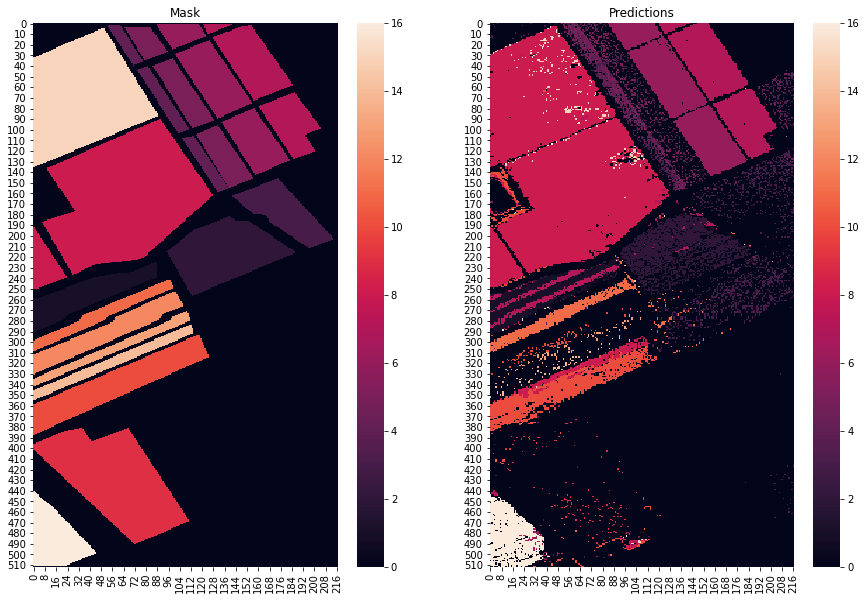

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 10))
sns.heatmap(mask, ax=ax1)
sns.heatmap(predictions_map, ax=ax2)
ax1.set_title('Mask')
ax2.set_title('Predictions')

## Assignment

Find out the most important features for data of your variant. Assess the relationship between the model's accuracy and the number of selected features. Use previously acquired skills such as dataset splitting, cross-validation. 

### Upon the completion of the assignment, the following must be done

1. DataFrame with features and the importance sorted by desc descending.
2. Figures show the results of the assessment of the relationship between the model's accuracy and the number of selected features.
3. Table containing f1-score, precision, and recall obtained by the best model you trained.
4. Visualize predictions of your best model.

Data is available at the following link: 
https://beryl.ssau.ru/nextcloud/index.php/s/62ss9Pa9FdpECrt

---
## Задание

Найти наиболее информативные признаки для данных вашего варианта. Произвести оценки зависимости точности модели и числа выбранных признаков. Используйте полученные ранее знания, такие как разбиение наборов данных и кросс-валидация.


### Результаты, которые необходимо получить в итоге:

1. DataFrame с признаками и их информативностью, отсортированный по убыванию.
2. Графики, показывающие результат оценки зависимости точности модели и числа выбранных признаков.
3. Таблица содержащая f1-score, precision, и recall полученные для лучшей модели, которую вы смогли обучить.
4. Визуализируйте предсказания вашей лучшей модели.

Данные доступны по следующей ссылке:
https://beryl.ssau.ru/nextcloud/index.php/s/62ss9Pa9FdpECrt